In [1]:
# NO CODE

from prob140 import *
from datascience import *
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

## The Binomial Distribution ##

We have just seen how to find the distribution of the number of heads in three tosses of a coin. In this section we will generalize the method and find the distribution of the number of heads in any fixed number of tosses of any coin, fair or biased.

The image of tossing coins (possibly biased) and counting heads is a good way to think about counting successes in repeated independent trials. For example:

- Counting the number of times the face with two spots appears in 10 rolls of a die is like counting the number of heads in 10 tosses of a coin that lands heads with chance $1/6$.
- Counting the number of times red pockets win in 20 spins of a roulette wheel is like counting the number of heads in 20 tosses of a coin that lands heads with chance $18/38$.
- Counting the number of college graduates in a sample of size 100 drawn at random with replacement from a population in which 20% of the people are college graduates is like counting the number of heads in 100 tosses of a coin that lands heads with chance $0.2$.

### Two Sixes in Five Rolls ###
We will figure out the pieces of the calculation in a particular example. After that, generalization will be straightforward.

Suppose a die is rolled five times. What is the chance of getting two sixes?

A natural way to approach the question is to say that we have five independent trials, each of which can be a success (six) or failure (not a six). We want the chance of two successes. As always, it is good to start by listing some of the ways the event can happen. 

If $S$ stands for success and $F$ for failure, then one way in which the event could happen is the sequence $SSFFF$. We know that

$$
P(SSFFF) ~ = ~ \big{(} \frac{1}{6} \big{)}^2 \big{(} \frac{5}{6} \big{)}^3
$$

Another way the event could occur is $SFSFF$. The chance of this is

$$
P(SFSFF) ~ = ~ \frac{1}{6} \cdot \frac{5}{6} \cdot \frac{1}{6} \big{(} \frac{5}{6} \big{)}^2 ~ = ~ \big{(} \frac{1}{6} \big{)}^2 \big{(} \frac{5}{6} \big{)}^3
$$

Every sequence that contains two $S$ entries and three $F$ entries will have the same chance. Write out a few more and check! In each case the probability has two factors of $1/6$ and three factors of $5/6$.

How many such sequences are there? There are five positions to fill with $S$ and $F$. Pick two of the five positions for the $S$ entries and fill all the others with $F$. Since the only choice involved is in picking two out of five spots, the number of ways you can do this is $\binom{5}{2}$. 

The chance of two sixes in five rolls is the total chance of all sequences that have two $S$ entries and three $F$ entries.

- Each such sequence has chance $\big{(} \frac{1}{6} \big{)}^2 \big{(} \frac{5}{6} \big{)}^3$.
- There are $\binom{5}{2}$ such sequences, and they are mutually exclusive.

By the addition rule, the total chance is

$$
P(\text{2 sixes in 5 rolls}) ~ = ~ \binom{5}{2} \big{(} \frac{1}{6} \big{)}^2 \big{(} \frac{5}{6} \big{)}^3
$$

### Binomial Distribution ###
To generalize this calculation, let's recall the assumptions and define some notation.

- There are $n$ trials, where $n$ is a fixed number.
- The trials are independent of each other.
- Each trial results in success or failure.
- On each individual trial, the chance of success is $p$.

In our example above, there are $n = 5$ independent trials, each of which is a success (six) with chance $p = 1/6$.

Let $X$ be the number of successes. Suppose we want to find $P(X = k)$. In our example above, $k = 2$. Then

$$
P(X = k) ~ = ~ \binom{n}{k} p^k (1-p)^{n-k}, ~~~ 0 \le k \le n
$$

This is called the *binomial formula*. The term *binomial* comes from the fact that the probabilities are the terms in the binomial expansion of $(a + b)^n$ in the case $a = p$ and $b = 1-p$. 

We say that the number of successes $X$ has the *binomial distribution* with parameters $n$ and $p$. A *parameter* is a fixed number associated with a distribution. 

The name of the distribution is usually shortened to the *binomial $(n, p)$ distribution*. 

### Features of the Distribution ###
The binomial distribution has many wonderful properties, as we will discover in this course. Here are some basic properties that you can think of as "sanity checks".

**1.** In $n$ trials, the smallest possible number of successes is 0 and the largest possible number is $n$. That is why the range of possible values $k$ is $0 \le k \le n$.

**2.** For $k = 0$, the formula says

$$
P(X = 0) ~ = ~ \binom{n}{0} p^0 (1-p)^n ~ = ~ 1 \cdot 1 \cdot (1-p)^n ~ = ~ (1-p)^n
$$

This makes sense. "The number of successes is 0" is the same event as "all the trials are failures". 

You should check that the formula also makes sense for $k = n$. It says that $P(X = n) = p^n$.

**3.** The formula does result in a distribution: the terms add up to 1. That is because they are all the terms in the binomial expansion of $(p + (1-p))^n$ and $p + (1-p) = 1$.

### Calculation ###
Calculating binomial probabilities just involves recalling the calculation of $\binom{n}{k}$ and plugging in the rest of the factors correctly. Here are some examples.

We started this section with the chance of getting two sixes in five rolls of a die.

$$
P(\text{2 sixes in 5 rolls}) ~ = ~ \binom{5}{2} \big{(} \frac{1}{6} \big{)}^2 \big{(} \frac{5}{6} \big{)}^3 ~ = ~ \frac{5 \times 4}{2!} \big{(} \frac{1}{6} \big{)}^2 \big{(} \frac{5}{6} \big{)}^3 ~ \approx ~ 16\%
$$

In the last section, we found that the chance of getting one head in three tosses of a coin is $3/8$. That's the chance of getting one success in three independent trials each of which is a success with chance $1/2$, and the binomial formula says

$$
P(\text{1 head in 3 tosses}) ~ = ~ \binom{3}{1} \big{(} \frac{1}{2} \big{)}^1 \big{(} \frac{1}{2} \big{)}^2 ~ = ~ 3 \times \frac{1}{8} ~ = ~ \frac{3}{8}
$$

The factor $\binom{n}{k}$ can be large for even moderate values of $n$ and $k$. For example, $\binom{20}{10} = 184756$ and is not pleasant to calculate by hand. Fortunately, we have Python!

### Binomial Probabilities in Python ###
`SciPy` is a compendium of Python software that is enormously useful in data science. In particular, its `stats` module contains numerous functions and methods used by data scientists. We will import the module in the cell below, but in future sections it will always have been imported before the start of the section.

In [2]:
from scipy import stats

Recall that a probability distribution is sometimes called a probability mass function or pmf. If $X$ has the binomial $(n, p)$ distribution, the call below evaluates to $P(X = k)$:

`stats.binom.pmf(k, n, p)`

For example, the chance of 2 sixes in 5 rolls of a die is

In [3]:
stats.binom.pmf(2, 5, 1/6)

0.16075102880658432

This agrees with the our calculation earlier in the section. 

In a spin of a roulette wheel, the winning pocket is red with chance $18/38$, independently of other spins. The chance that the winner is red in 12 out of 20 spins of a roulette wheel is about 9.5%.

In [4]:
stats.binom.pmf(12, 20, 18/38)

0.094646644937626534

You can use `stats.binom.pmf` to get more than one probability in a binomial distribution in a single call. If `k_array` is an array of possible values, then `stats.binom.pmf(k_array, n, p)` evaluates to an array of binomial $(n, p)$ probabilities for all $k$ in `k_array`.

For example, here are all the probabilities in the binomial $(3, 1/2)$ distribution. They are the probabilities in the distribution of the number of heads in 3 tosses of a coin.

In [5]:
stats.binom.pmf(np.arange(4), 3, 1/2)

array([ 0.125,  0.375,  0.375,  0.125])

They add up to 1:

In [6]:
sum(stats.binom.pmf(np.arange(4), 3, 1/2))

1.0000000000000007

Here is the probability histogram of the number of sixes in 12 rolls of a die, that is, the histogram of the binomial $(12, 1/6)$ distribution. 

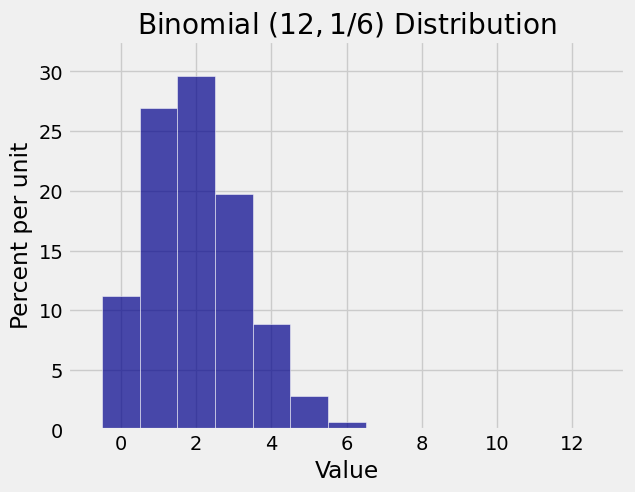

In [7]:
# NO CODE

n = 12
p = 1/6
k_array = np.arange(n+1)
binom_n_p_probs = stats.binom.pmf(k_array, n, p)
binom_n_p_dist = Table().values(k_array).probabilities(binom_n_p_probs)
Plot(binom_n_p_dist)
plt.title('Binomial $(12, 1/6)$ Distribution');

Notice that 2 is the most likely value. That makes sense. Roughly, you expect about $1/6$ of the rolls to be sixes. So in 12 trials, you expect roughly 2 sixes.

It can be shown that all binomial histograms either look like this one in the sense that the probabilities rise and then fall; or the probabilities only rise; or they only fall. But they can't bob up and down repeatedly like waves.

### College Graduates in a Random Sample ###
Suppose you take a sample of 100 people at random with replacement from a population in which 20% of the people are college graduates. What is the chance that you get more than 10 college graduates in your sample?

The sample is being drawn with replacement. So the draws are $n = 100$ independent trials, each of which results in a success (college graduate) with chance $p = 0.2$.

Let $X$ be the number of college graduates in the sample. Then $X$ has the binomial $(100, 0.2)$ distribution.

We want $P(X > 10)$. By the binomial formula and the addition rule, this is

$$
P(X > 10) ~ = ~ \sum_{k=11}^{100} \binom{100}{k} 0.2^k 0.8^{100-k}
$$

The expression in the cell below evaluates to this sum.

In [8]:
sum(stats.binom.pmf(np.arange(11, 101), 100, 0.2))

0.99430361904420617

The chance that there are more than 10 college graduates in the sample is just about 99.43%. 

This high value makes sense. Since 20% of the population are college graduates, you expect roughly 20% college graduates in a large random sample. So it is not surprising that the chance of more than 10 college graduates in a random sample of size 100 is high.